In [1]:
import tensorflow as tf
from tensorflow.keras.layers import Masking, Flatten
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import ModelCheckpoint
from sklearn.model_selection import KFold

2024-06-04 21:10:39.629525: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-06-04 21:10:39.672907: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-06-04 21:10:40.354523: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
import numpy as np
import pandas as pd
import cv2  # OpenCVライブラリ
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize
import glob
import os
import sys
import pathlib
from pathlib import Path

from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [3]:
current_dir = os.getcwd()
parent_dir = os.path.dirname(current_dir)
sys.path.append(parent_dir)
current_file_path = pathlib.Path(os.getcwd())
parent_dir = current_file_path.parent

In [4]:
import fluid_intake_estimate
from fluid_intake_estimate import variable_data_set
from fluid_intake_estimate import cnn
from fluid_intake_estimate import mlp

/home/s2/Desktop/washino/swallowing
/home/s2/Desktop/washino/swallowing


In [5]:
directory_path = parent_dir / 'dataset'

# 鷲野のデータを学習

In [ ]:
path = directory_path / 'washino'
csv_path = path / 'washino.csv'
data = variable_data_set.VariableDataSet(300)
data.csv_to_dataset(path, csv_path, 0)
model = cnn.CNN()

In [ ]:
model_checkpoint = ModelCheckpoint(
    filepath='cnn_20240516_model_best.keras',  # 保存するファイルのパス
    monitor='val_mean_absolute_error',        # 監視する値
    save_best_only=True,       # 最良のモデルのみを保存
    verbose=1,                 # 進行状況のメッセージ表示
    mode='min'                 # 「減少」を監視
)

model.training(data.X, data.y, 50, 32, model_checkpoint = model_checkpoint)
model.save('cnn_20240516_model_v1.keras')

# 全員のデータを学習して分割交差検証

In [11]:
names = ['washino', 'haruki', 'ezumi', 'hikaru', 'ibuki', 'kanata', 'kazuki', 'kishimoto', 'kosasayama', 'mocchi', 'nakaryo', 'ruku', 'shibata', 'soichiro', 'tsuji']

data = variable_data_set.VariableDataSet(786, scale=222, time_range = 20000)
# data = variable_data_set.VariableDataSet(786, scale=0, time_range = 20000)

# path = directory_path / 'washino'
# csv_path = path / 'washino.csv'
# data.csv_to_dataset(path, csv_path, 0)

count = 0

for name in names:    
    path = directory_path / name
    wav_files = glob.glob(os.path.join(path, '*.wav'))
    wav_file_count = len(wav_files)    
    
    csv_path = path / f'{name}.csv'    
    data.csv_to_dataset(path, csv_path, count, signal_processing='fft')
    count += wav_file_count
    print(count)

8
[]
161
[]
352
382
413
444
447
[]
474
504
538
571
601
627
[]
631
661
694
724
755
786


In [12]:
# 分割交差検証の設定
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# データを保持するためのリスト
train_data_splits_index = []
test_data_splits_index = []

# データのインデックスを分割
for train_index, test_index in kf.split(data.X):
    train_data_splits_index.append(train_index)
    test_data_splits_index.append(test_index)

In [13]:
y = []
predict = []

In [15]:
model = cnn.CNN(scale = 222, time_range = 20000)
# model = mlp.MLP(time_range = 20000)

model_checkpoint = ModelCheckpoint(
    filepath='cnn_20240604_model_best_0.keras',  # 保存するファイルのパス
    monitor='val_mean_absolute_error',        # 監視する値
    save_best_only=True,       # 最良のモデルのみを保存
    verbose=1,                 # 進行状況のメッセージ表示
    mode='min'                 # 「減少」を監視
)


use_data = 0

model.training(data.X[train_data_splits_index[use_data]], data.y[train_data_splits_index[use_data]], 50, 32)
model.evaluate(data.X[test_data_splits_index[use_data]], data.y[test_data_splits_index[use_data]])
model.save('cnn_20240604_model_0.keras1.keras')

2024-06-04 21:20:06.389994: W tensorflow/tsl/framework/bfc_allocator.cc:485] Allocator (GPU_0_bfc) ran out of memory trying to allocate 9.34GiB (rounded to 10034400000)requested by op _EagerConst
If the cause is memory fragmentation maybe the environment variable 'TF_GPU_ALLOCATOR=cuda_malloc_async' will improve the situation. 
Current allocation summary follows.
Current allocation summary follows.
2024-06-04 21:20:06.390721: I tensorflow/tsl/framework/bfc_allocator.cc:1039] BFCAllocator dump for GPU_0_bfc
2024-06-04 21:20:06.390956: I tensorflow/tsl/framework/bfc_allocator.cc:1046] Bin (256): 	Total Chunks: 83, Chunks in use: 83. 20.8KiB allocated for chunks. 20.8KiB in use in bin. 5.3KiB client-requested in use in bin.
2024-06-04 21:20:06.391071: I tensorflow/tsl/framework/bfc_allocator.cc:1046] Bin (512): 	Total Chunks: 5, Chunks in use: 5. 2.5KiB allocated for chunks. 2.5KiB in use in bin. 2.5KiB client-requested in use in bin.
2024-06-04 21:20:06.391076: I tensorflow/tsl/framework

2024-06-04 21:20:06.391791: I tensorflow/tsl/framework/bfc_allocator.cc:1095] InUse at 72307c006900 of size 24576 next 77
2024-06-04 21:20:06.391795: I tensorflow/tsl/framework/bfc_allocator.cc:1095] InUse at 72307c00c900 of size 256 next 131
2024-06-04 21:20:06.391798: I tensorflow/tsl/framework/bfc_allocator.cc:1095] InUse at 72307c00ca00 of size 256 next 115
2024-06-04 21:20:06.391801: I tensorflow/tsl/framework/bfc_allocator.cc:1095] InUse at 72307c00cb00 of size 256 next 141
2024-06-04 21:20:06.391804: I tensorflow/tsl/framework/bfc_allocator.cc:1095] InUse at 72307c00cc00 of size 256 next 127
2024-06-04 21:20:06.391807: I tensorflow/tsl/framework/bfc_allocator.cc:1095] InUse at 72307c00cd00 of size 256 next 138
2024-06-04 21:20:06.391810: I tensorflow/tsl/framework/bfc_allocator.cc:1095] InUse at 72307c00ce00 of size 256 next 105
2024-06-04 21:20:06.391813: I tensorflow/tsl/framework/bfc_allocator.cc:1095] InUse at 72307c00cf00 of size 256 next 118
2024-06-04 21:20:06.391816: I t

KeyboardInterrupt: 

In [ ]:
y.append(data.y[test_data_splits_index[use_data]])
predict.append(model.predictions)

In [ ]:
print(len(predict))

In [ ]:
array_y = np.concatenate(y)
array_pre = np.concatenate(predict)

In [ ]:
plt.scatter(array_y, array_pre)
plt.xlabel('y')
plt.ylabel('predict')
plt.title('Scatter Plot of y vs predict')
plt.show()

# R2スコアの計算
r2 = r2_score(array_y, array_pre)
print(f"R2 Score: {r2}")

# MAEの計算
mae = mean_absolute_error(array_y, array_pre)
print(f"Mean Absolute Error (MAE): {mae}")

      
      # RMSEの計算
rmse = np.sqrt(mean_squared_error(array_y, array_pre))
print(f"Root Mean Squared Error (RMSE): {rmse}")

In [26]:
array_pre = array_pre.flatten()

In [27]:
combined_array = np.vstack((array_y, array_pre)).T
np.savetxt("mlp_20240520.csv", combined_array, delimiter=",", header="y,predict", comments='')

In [20]:
df0 = pd.read_csv("stft_cnn_20240520_0.csv")
print(df0)
df1 = pd.read_csv("stft_cnn_20240520_1.csv")
print(df1)
df2 = pd.read_csv("stft_cnn_20240520_2.csv")
print(df2)
df3 = pd.read_csv("stft_cnn_20240520_3.csv")
print(df3)
df4 = pd.read_csv("stft_cnn_20240520_4.csv")
print(df4)

         y   predict
0    1.045  0.763706
1    0.677  0.237178
2    0.791  0.455848
3    0.069  0.602695
4    0.323  0.157330
..     ...       ...
153  0.570  0.417902
154  0.830  0.493793
155  0.824  0.522705
156  0.876  0.518229
157  0.999  0.392987

[158 rows x 2 columns]
         y   predict
0    0.215  0.627778
1    0.343  0.457409
2    0.442  0.806398
3    0.064  0.615129
4    0.134  0.581777
..     ...       ...
152  0.559  0.217453
153  0.400  0.451681
154  0.499  0.565259
155  0.472  0.553005
156  0.662  0.555584

[157 rows x 2 columns]
         y   predict
0    0.446  0.244687
1    0.862  0.392548
2    0.281  0.668674
3    0.600  0.469109
4    0.099  0.351028
..     ...       ...
152  0.375  0.426757
153  0.383  0.267976
154  0.599  0.633823
155  0.723  0.188216
156  0.934  0.384642

[157 rows x 2 columns]
         y   predict
0    0.264  0.438693
1    0.251  0.478662
2    0.000 -0.000524
3    0.440  0.436390
4    0.169  0.685015
..     ...       ...
152  0.064  0.154220
153 

In [22]:
df = [df0, df1, df2, df3, df4]
combined_df = pd.concat(df, ignore_index=True)

# 結合したDataFrameを表示
print(combined_df)

         y   predict
0    1.045  0.763706
1    0.677  0.237178
2    0.791  0.455848
3    0.069  0.602695
4    0.323  0.157330
..     ...       ...
781  0.300  0.482164
782  0.634  0.405774
783  0.572  0.651532
784  0.736  0.174094
785  0.944  0.619232

[786 rows x 2 columns]


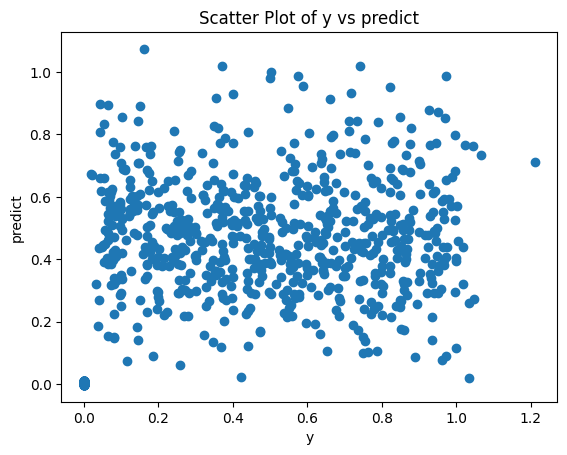

R2 Score: -0.025248048455605465
Mean Absolute Error (MAE): 0.24721094137931637
Root Mean Squared Error (RMSE): 0.3213839436367265


In [23]:
plt.scatter(combined_df['y'], combined_df['predict'])
plt.xlabel('y')
plt.ylabel('predict')
plt.title('Scatter Plot of y vs predict')
plt.show()

# R2スコアの計算
r2 = r2_score(combined_df['y'], combined_df['predict'])
print(f"R2 Score: {r2}")

# MAEの計算
mae = mean_absolute_error(combined_df['y'], combined_df['predict'])
print(f"Mean Absolute Error (MAE): {mae}")

      
      # RMSEの計算
rmse = np.sqrt(mean_squared_error(combined_df['y'], combined_df['predict']))
print(f"Root Mean Squared Error (RMSE): {rmse}")